# Intro to Iris Data
Loads and displays the classice iris dataset.
Makes a scatter matrix plot. 

In [1]:
import sys
sys.path.append('/home/jovyan/')

import pandas as pd
import sklearn
import sklearn.datasets

import scripts.visualization.graphs as myGraphs

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,18)

In [2]:
data = sklearn.datasets.load_iris(as_frame=True)

In [3]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = data['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualizing

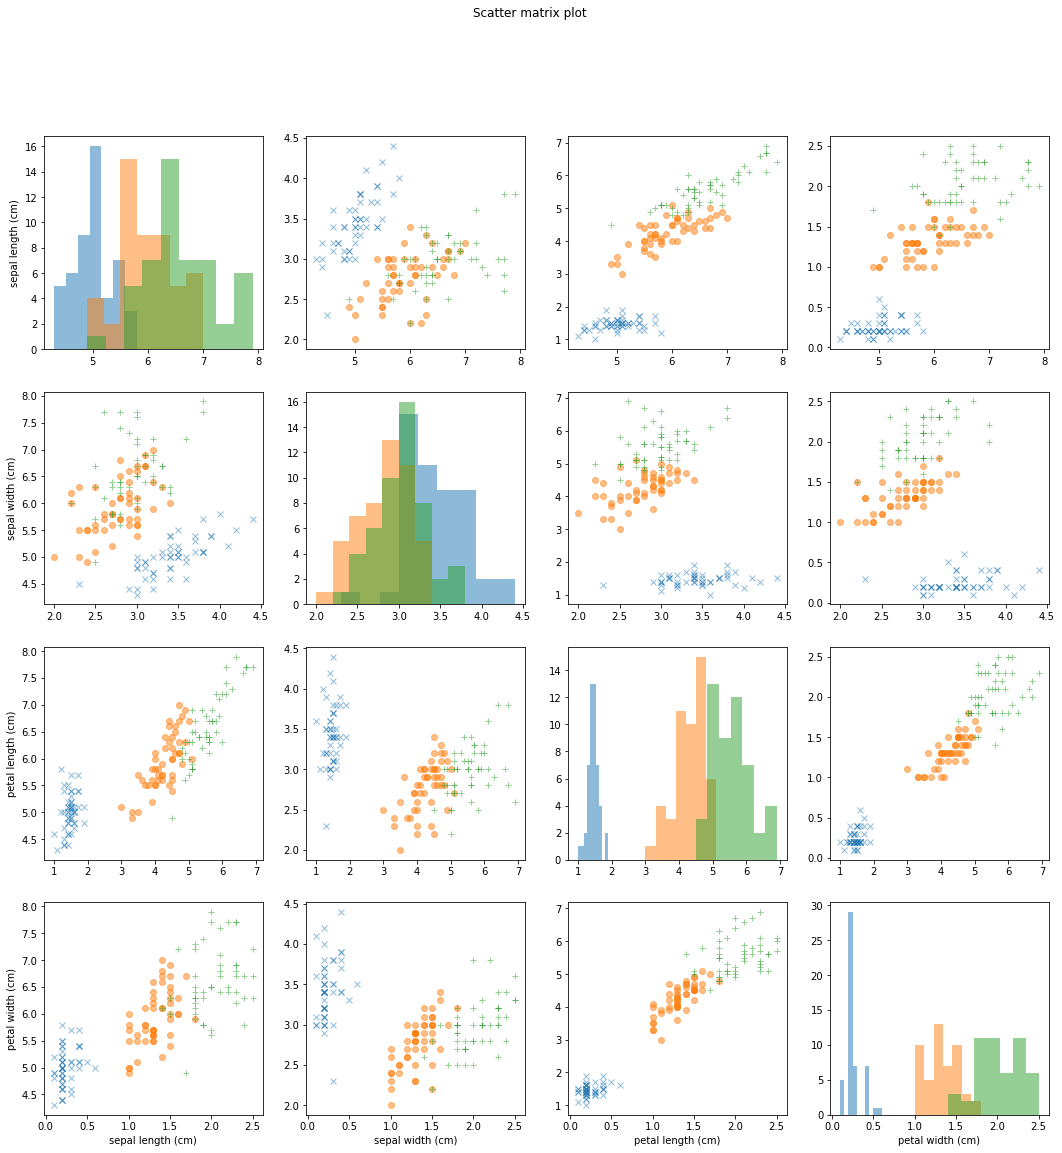

In [7]:
fig, axs = myGraphs.scatterMatrix(df, 'target')
fig.suptitle('Scatter matrix plot')
fig.savefig('/home/jovyan/report/ScatterMatrixPlot.png')